# **DIAMONDS**

## **About Dataset** 

<span>•</span> The dataset used for this project : [Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds)

<span>•</span> This dataset contains 53940 rows indicating the distinct diamonds and their 10 different features.<br><br>

**Feature Information**

<span>•</span> **price** : price in US dollars ($326--$18,823)

<span>•</span> **carat** : weight of the diamond (0.2--5.01)

<span>•</span> **cut** : quality of the cut (Fair, Good, Very Good, Premium, Ideal) (from worst to best)

<span>•</span> **color** : diamond colour, from J (worst) to D (best)

<span>•</span> **clarity** : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

<span>•</span> **x** : length in mm (0--10.74)

<span>•</span> **y** : width in mm (0--58.9)

<span>•</span> **z** : depth in mm (0--31.8)

<span>•</span> **depth** : total depth percentage = (z / mean(x, y) * 100) = ((2 * z / (x + y)) * 100) (43--79)

<span>•</span> **table** : width of top of diamond relative to widest point (percentage) (43--95)  (table diameter/diamond dimater) * 100

(**table diameter** : the longest length of the flat top surface)

## **Exploratory Data Analysis**

### **First Glance at the Data**

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OrdinalEncoder
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings("ignore")


In [2]:
# Reading csv file

data = pd.read_csv('D:\kaggle\diamonds.csv')
data.drop('Unnamed: 0',axis = 1, inplace = True)
data
# we have 53940 rows and 10 columns

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df = data.copy()
info = df.info(memory_usage=False) 
null_values = df.isnull().sum()
print(f"{info}\n-----------------------------------------\nNULL_VALUES\n{null_values}")
# there is nothing wrong with data types and no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)None
-----------------------------------------
NULL_VALUES
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### **Categorical Columns Analysis**

In [4]:
# Categorical Columns

cat_cols = [col for col in df.columns if df[col].dtypes in ["object"]]

df_cat_info = df[cat_cols].describe().T
df_cat_info[['freq', 'count']] = df_cat_info[['freq', 'count']].astype(int)
df_cat_info['top_percentage(%)'] = round(((df_cat_info['freq']/df_cat_info['count'])*100),2)
print(f"CAT_COLS\n\n{cat_cols}\n---------------------------------------------------\n{df_cat_info}")

CAT_COLS

['cut', 'color', 'clarity']
---------------------------------------------------
         count unique    top   freq  top_percentage(%)
cut      53940      5  Ideal  21551              39.95
color    53940      7      G  11292              20.93
clarity  53940      8    SI1  13065              24.22


In [5]:
for i in cat_cols:
    print(f"{df[i].value_counts()}\n-------------------------")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
-------------------------
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
-------------------------
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
-------------------------


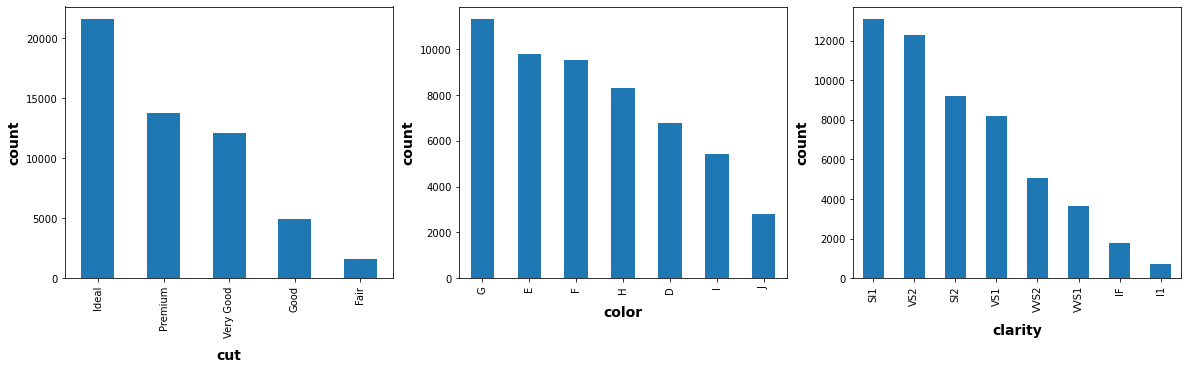

In [6]:
# Bar plots for the categorical columns

fig, ax = plt.subplots(1, 3)
axi = 0
ayi = 0
if axi < len(cat_cols):
    for i in cat_cols:
        df[i].value_counts().plot(kind = 'bar', ax = ax[axi], figsize = (20,5))
        ax[axi].set_ylabel('count', fontsize = 14, fontweight = 'bold', labelpad = 5)
        ax[axi].set_xlabel(i, fontsize = 14, fontweight = 'bold', labelpad = 12)
        axi+=1
    plt.show()
        


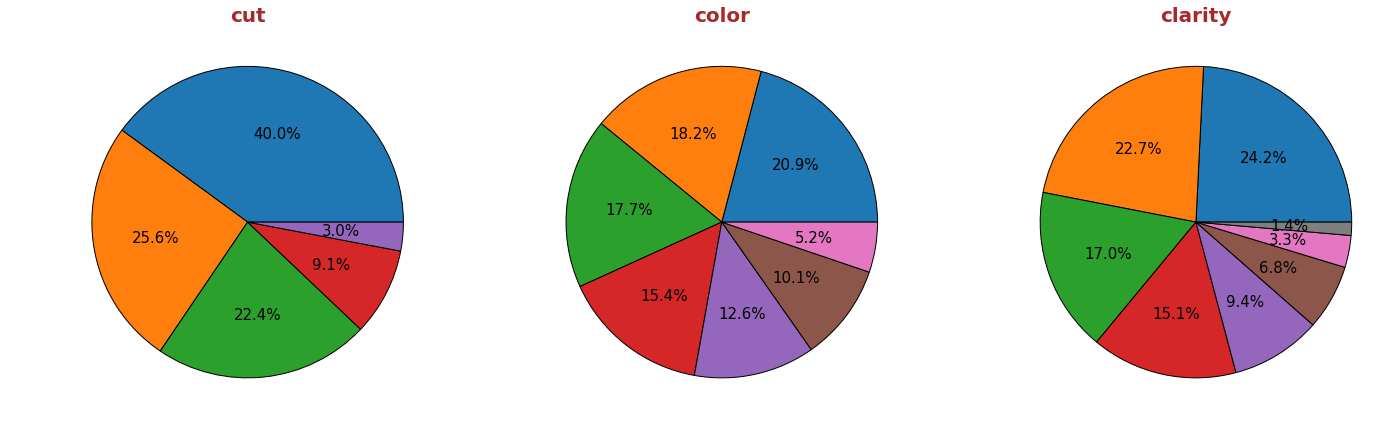

In [ ]:
# Pie plots for the categorical columns

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for j, i in enumerate(cat_cols):
    plot = ax[j].pie(df[i].value_counts(), labels=df[i].unique(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 15, 'color': 'black'})
    ax[j].set_title(i, fontsize = 20, color = 'brown', fontweight = 'bold')
    
    for pct in plot[1]:
        pct.set_fontsize(16)
        
plt.tight_layout()
plt.show()

### **Numeric Columns Analysis**

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


<span>•</span> Is it possible that one of the x,y and z values is zero?

In [9]:
df_filtered = df[(df[['x','y','z']] == 0).any(axis = 1)]
df_filtered
# It doesn't make sense that one of those columns is zero. Even if it does, since the depth formula is z/mean(x,y)*100,
# the depth values also should be zero when the z value is zero. Also, some rows have zero values for all dimensions(x,y,z) Because of that
# the dataset can be considered defective.

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
len(df_filtered)  # These rows will be deleted from the data on account of not too much data loss.

20

In [11]:
df.drop(labels = df_filtered.index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53916,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53917,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53918,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### **Distribution and Ouliers**
<span>•</span> Since the target column of the dataset is the price column, the outlier analysis will be performed only on that column.

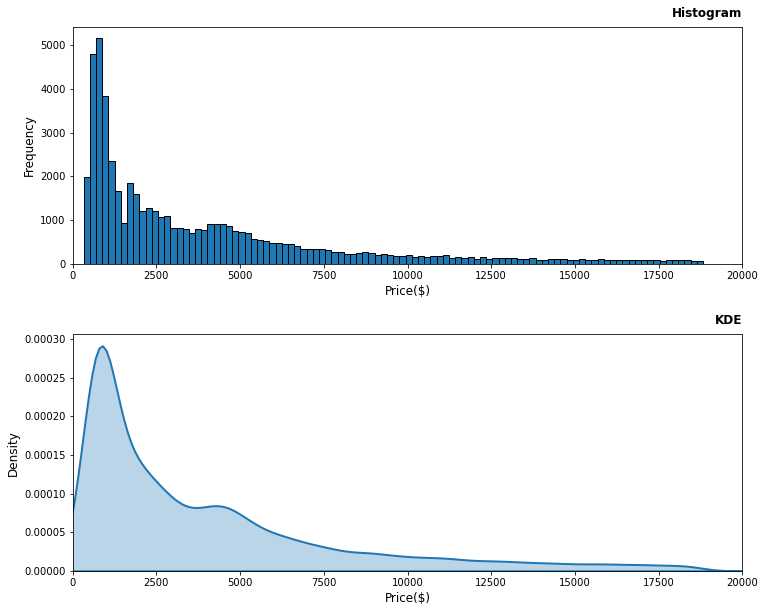

In [12]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].hist(df['price'], edgecolor = 'black', bins = 100) 
ax[0].set_title('Histogram', loc = 'Right', pad = 10,  fontsize = 12, fontweight='bold')
ax[0].set_xlim(0, 20000)
ax[0].set_xlabel('Price($)', fontsize = 12)
ax[0].set_ylabel('Frequency', fontsize = 12)
sns.kdeplot(df['price'], ax = ax[1], linewidth = 2,  shade=True, alpha = 0.3)
ax[1].set_title('KDE', loc = 'Right', pad = 10, fontsize = 12, fontweight='bold')
ax[1].set_xlabel('Price($)', fontsize = 12)
ax[1].set_ylabel('Density', fontsize = 12)
ax[1].set_xlim(0, 20000)

plt.subplots_adjust(hspace=0.3)
plt.show()

# The distribution is right-skewed obviously.

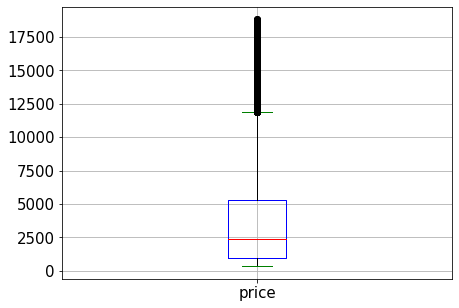

In [13]:
df['price'].plot(kind='box', figsize=(7,5), fontsize=15, color=dict(boxes='blue', whiskers='black', medians='red', caps='green'), grid=True)
plt.show()


<span>•</span> Outliers for the column can be observed with a boxplot. The thresholds are calculated using the IQR (interquartile range) formula. However, since the distribution seems right-skewed, this calculation may not be the best. For this reason, before specifying thresholds I will check the skewness and kurtosis values for the distribution.

In [14]:
mean_price = int(df['price'].mean())
median_price = int(df['price'].median())
print(f"mean_price: {mean_price}\nmedian_price: {median_price}")

# mean > median also shows that the distribution is right-skewed.

mean_price: 3930
median_price: 2401


<span>•</span> Fisher's Skewness

In [15]:
skew(df['price'])

# Right-skewed (>0) means we have a long right tail and more outliers than a normal distribution.

1.61830361290786

<span>•</span> Kurtosis

In [16]:
kurtosis(df['price'], fisher=False) 

# The data has leptokurtic distribution. (kurtosis>3 (kurtosis=3 is normal distribution)) 
# indicates likely more "peaked" than a normal distribution.

5.1780772756974836

<span>•</span> Percentile Choice for Outlier Detection

99th percentile is a good starting point for leptokurtic, right-skewed distributions. I'd like to focus on the most extreme values without manipulating and removing too much data. Also there is no need for using a lower threshold by the reason of data clusters tightly at the lower end and has a long tail.

In [17]:
# Let's check the 99th percentile price

quantile_99_price = df['price'].quantile(.99)
quantile_99_price

17365.809999999998

In [18]:
df[df['price']>quantile_99_price].sort_values(by = 'price')

,carat,cut,color,clarity,depth,table,price,x,y,z
27133,1.59,Ideal,F,VS1,62.9,57.0,17366,7.38,7.48,4.62
27134,1.95,Very Good,H,VS2,61.7,55.0,17374,8.00,8.05,4.95
27135,1.97,Very Good,H,VS2,62.9,59.0,17377,7.90,8.01,5.00
27136,2.04,Premium,E,SI2,58.3,58.0,17379,8.35,8.31,4.86
27137,2.17,Ideal,I,SI1,60.4,56.0,17381,8.43,8.36,5.07
...,...,...,...,...,...,...,...,...,...,...
27728,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27729,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27730,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27731,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [19]:
df = df[df['price']<quantile_99_price]
df.reset_index(drop = True, inplace = True)
print(len(df)) 
df.sort_values(by='price', ascending=False)

# we have 53380 rows now.

53380


,carat,cut,color,clarity,depth,table,price,x,y,z
27132,2.39,Ideal,J,VS1,62.1,57.0,17365,8.53,8.57,5.31
27131,2.01,Good,I,VS1,62.5,56.0,17365,7.96,8.00,4.99
27130,1.70,Ideal,F,VS2,62.4,57.0,17360,7.65,7.57,4.75
27129,1.60,Premium,G,VVS1,61.5,58.0,17360,7.58,7.48,4.63
27128,1.79,Premium,G,VS2,61.2,58.0,17358,7.90,7.82,4.81
...,...,...,...,...,...,...,...,...,...,...
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


### **Adding New Feature (volume)**

<span>•</span> I did some research to aggregate all dimensions (x,y,z) into a feature. The volume of each diamond seems reasonable for this. Therefore, analyzing the relationship with the target parameter will be easier.

<span>•</span> Here is the formula called ellipsoid approximation `(4/3)*pi*(L/2)*(W/2)*(D/2) = (pi/6)*L*W*D`
for this dataset L(length)=x, W(width)=y, D(depth)=z  which means our formula is `(pi/6)*x*y*z` and the unit will be mm<sup>3</sup>

<span>•</span> In fact, the calculation of the volume probably depends on many things, such as the shape and cut of the diamond, but this formula can be used for a rough estimation.

In [20]:
df['volume'] = round(math.pi/6 * (df['x']*df['y']*df['z']), 2)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,20.00
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,18.07
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,19.94
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,24.46
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,27.18
...,...,...,...,...,...,...,...,...,...,...,...
53375,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,60.70
53376,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,61.84
53377,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,59.93
53378,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,73.70


## **Relationships and Trends**

### **Numeric Columns**

In [21]:
# Correlations between numeric columns.

corr = round(df.corr(),2)
corr

,carat,depth,table,price,x,y,z,volume
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.96,0.98
depth,0.03,1.00,-0.30,-0.01,-0.02,-0.03,0.10,0.01
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15,0.17
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87,0.90
x,0.98,-0.02,0.20,0.89,1.00,0.97,0.97,0.96
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95,0.98
z,0.96,0.10,0.15,0.87,0.97,0.95,1.00,0.95
volume,0.98,0.01,0.17,0.90,0.96,0.98,0.95,1.00


<span>•</span> It can be recognized that the correlation between carat and volume is almost 1 (0.98) which is not surprising at all. That shows us that the ellipsoid approximation formula gives a decent estimation of this diamond dataset.

In [25]:
# The correlation values between price and the other columns

corr.loc['price',corr.columns!='price']

carat     0.92
depth    -0.01
table     0.13
x         0.89
y         0.87
z         0.87
volume    0.90
Name: price, dtype: float64

<span>•</span> It seems the price parameter is highly correlated with the carat and the volume as expected. But not with the table percentage which is a bit odd to me. Because it specifies the amount of light changing in diamonds and causes various brightness levels from different views.

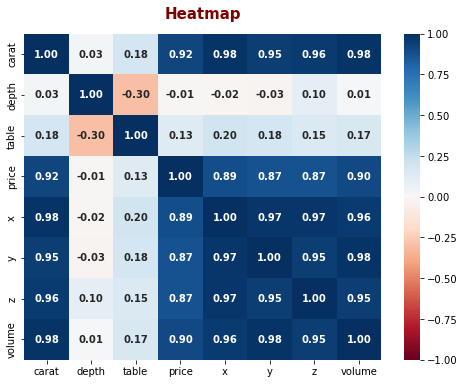

In [24]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':10, 'fontweight':'bold'}, fmt=".2f")
plt.title("Heatmap", fontsize = 15, fontweight = 'bold', color = 'maroon', pad = 15)
plt.show()

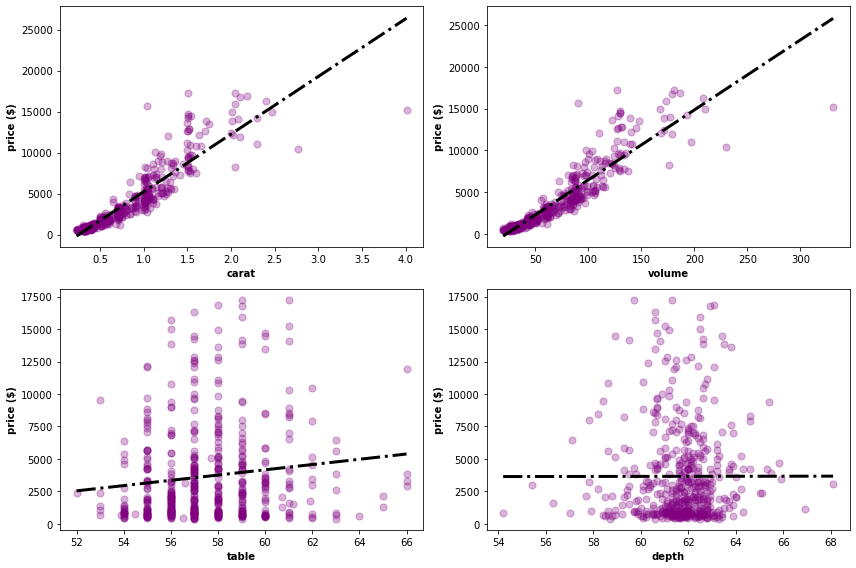

In [ ]:
# Regression plots with the numeric columns

df_scatter = df.sample(500, random_state=42)

columns = ['carat', 'volume', 'table', 'depth'] 
fig, ax = plt.subplots(2, 2, figsize=(12, 8)) 
ax = ax.flatten()

for col_index, col in enumerate(columns):
    sns.regplot(
        x=df_scatter[col], 
        y=df_scatter['price'], 
        ci=False, 
        line_kws={'lw': 3, 'color': 'black', 'linestyle': '-.'},
        scatter_kws={'s': 50, 'alpha': .3, 'color': 'purple'}, 
        ax=ax[col_index]
    )
    ax[col_index].set_xlabel(col, fontsize = 10, fontweight = 'bold')
    ax[col_index].set_ylabel('price ($)', fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

<span>•</span> As we saw the correlation values before, the regression plots seem reasonable.

### **Categorical Columns**

In [ ]:
cat_cols

['cut', 'color', 'clarity']

In [45]:
cat_unique = {}
for col in cat_cols:
    cat_unique[col] = df[col].unique()

cat_unique

{'cut': array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object),
 'color': array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object),
 'clarity': array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object)}

<span>•</span> I need to encode these columns to inspect the trends with the price. Since the categorical columns are in order, I'm going to be using **ordinal encoding**.

#### **Ordinal Encoding**

In [46]:
# Creating the lists for the categorical columns in order. (from worst to best)

cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = [i for i in sorted(df['color'].unique(), reverse=True)]
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

print(f"cut: {cut}\ncolor: {color}\nclarity: {clarity}")

cut: ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color: ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity: ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


In [ ]:
# Creating the ordinal encodings

cut_array = np.array(cut).reshape(-1,1)
color_array = np.array(color).reshape(-1,1)
clarity_array = np.array(clarity).reshape(-1,1)

ordinal_encoder_1 = OrdinalEncoder(categories=[cut])
ordinal_encoder_2 = OrdinalEncoder(categories=[color])
ordinal_encoder_3 = OrdinalEncoder(categories=[clarity])
cut_encoded = ordinal_encoder_1.fit_transform(cut_array)
color_encoded = ordinal_encoder_2.fit_transform(color_array)
clarity_encoded = ordinal_encoder_3.fit_transform(clarity_array)

In [49]:
# Adding and mapping the encoded values

df['cut_encoded'] = ordinal_encoder_1.transform(df[['cut']]).astype(int)
df['color_encoded'] = ordinal_encoder_2.transform(df[['color']]).astype(int)
df['clarity_encoded'] = ordinal_encoder_3.transform(df[['clarity']]).astype(int)

In [50]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,20.00,4,5,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,18.07,3,5,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,19.94,1,5,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,24.46,3,1,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,27.18,1,0,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,20.26,2,0,5
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,20.33,2,1,6
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,22.16,2,2,2
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,19.07,0,5,3
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,20.27,2,2,4


In [53]:
# The correlation values between the price and the categorical columns

corr_new = round(df.corr(),2)
corr_cat = corr_new.loc['price',['cut_encoded', 'color_encoded', 'clarity_encoded']]

corr_cat

# it seems there is no a strong trend any of those cut,color,clarity quality with price which is very odd.

cut_encoded       -0.06
color_encoded     -0.17
clarity_encoded   -0.14
Name: price, dtype: float64

<span>•</span> There is no strong trend in any of those cut, color, clarity quality with the price which is rather surprising.

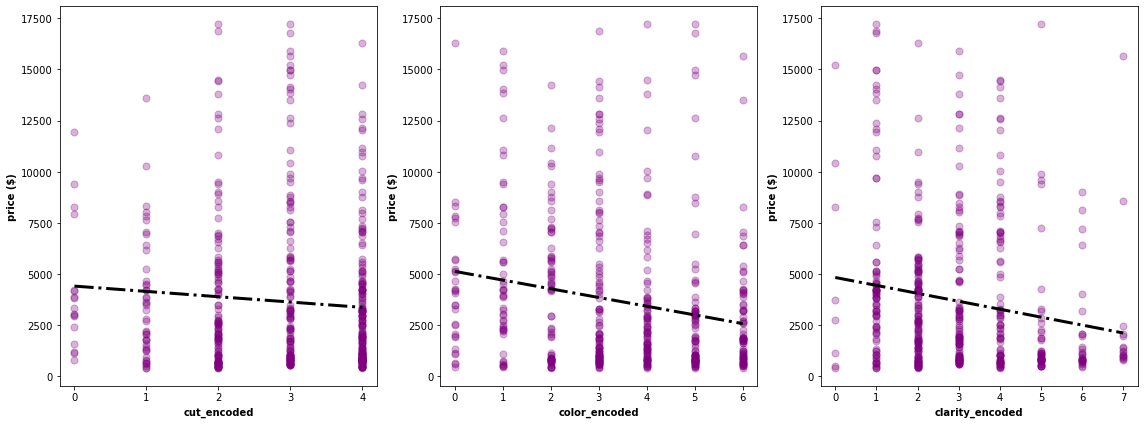

In [68]:
# Regression plots with the categorical columns

df_scatter = df.sample(500, random_state=42)
columns_2 = ['cut_encoded', 'color_encoded', 'clarity_encoded']
fig, ax = plt.subplots(1,3, figsize = (16,6))

col_index_2 = 0
for cat in columns_2:
    if col_index_2<3:
        sns.regplot(x = df_scatter[cat], y = df_scatter['price'], ci = False, line_kws={'lw':3, 'color': 'black', 'linestyle':'-.'},
                    scatter_kws={'s':50, 'alpha':.3, 'color': 'purple'}, ax = ax[col_index_2])
        ax[col_index_2].set_xlabel(cat, fontsize = 10, fontweight = 'bold')
        ax[col_index_2].set_ylabel('price ($)', fontsize = 10, fontweight = 'bold')
        ax[col_index_2].xaxis.set_major_locator(mticker.MultipleLocator(1))
        col_index_2+=1

plt.tight_layout()
plt.show()
         

<span>•</span> It's also seen on the plots that the relationships between the price and the categorical columns are weak.

# **Conclusion**

<span>•</span> The price of the diamonds highly correlated with the carat and the volume variables (indicating almost the same thing) as expected. But, the relationships of the other variables (excepting x,y, and z dimensions) with the price are minimal. Before analyzing the data, one easily may think that clarity, cut and table parameters should affect the prices substantially. The color even can be included among these columns. However, this study and the analyses show us the opposite. Due to the part of these outputs are still irrational to me perhaps the dataset is flawed despite being well organized.